* Rahil Sayyad
* Email id: rahilsayyad389@gmail.com

## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## read data

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Drop the column deck

In [5]:
df.drop("deck",axis=1,inplace=True)

## Drop the column survived

In [6]:
df.drop("survived",axis=1,inplace=True)

## fill the value in age column

In [7]:
df[['age']] = df[['age']].mean()

## fill the value in embark_town column

In [8]:
my_list = 'Southampton'
df['embark_town'] = df['embark_town'].fillna(my_list)

## fill the value in embarked column

In [9]:
my_list = ['S','C','Q']
for i in my_list:
    df['embarked'] = df['embarked'].fillna(i)

In [10]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,male,29.699118,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,29.699118,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,3,female,29.699118,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,29.699118,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,29.699118,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,female,29.699118,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,male,29.699118,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [11]:
df.isnull().sum()

pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## using LabelEncoder convert string value to int

In [12]:
l=['sex','embarked','class','who','adult_male','embark_town','alive','alone']
for i in l:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    le.fit(df[i])
    df[i]=le.transform(df[i])

In [13]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,29.699118,1,0,7.2500,2,2,1,1,2,0,0
1,1,0,29.699118,1,0,71.2833,0,0,2,0,0,1,0
2,3,0,29.699118,0,0,7.9250,2,2,2,0,2,1,1
3,1,0,29.699118,1,0,53.1000,2,0,2,0,2,1,0
4,3,1,29.699118,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,29.699118,0,0,13.0000,2,1,1,1,2,0,1
887,1,0,29.699118,0,0,30.0000,2,0,2,0,2,1,1
888,3,0,29.699118,1,2,23.4500,2,2,2,0,2,0,0
889,1,1,29.699118,0,0,30.0000,0,0,1,1,0,1,1


## seprate a dependant and independant variable (x=independant,y=dependant)

In [14]:
x=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12]]

In [15]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,3,1,29.699118,1,0,7.2500,2,2,1,1,2,0
1,1,0,29.699118,1,0,71.2833,0,0,2,0,0,0
2,3,0,29.699118,0,0,7.9250,2,2,2,0,2,1
3,1,0,29.699118,1,0,53.1000,2,0,2,0,2,0
4,3,1,29.699118,0,0,8.0500,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,29.699118,0,0,13.0000,2,1,1,1,2,1
887,1,0,29.699118,0,0,30.0000,2,0,2,0,2,1
888,3,0,29.699118,1,2,23.4500,2,2,2,0,2,0
889,1,1,29.699118,0,0,30.0000,0,0,1,1,0,1


In [16]:
y=df.iloc[:,-2]

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int32

## train_test_split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [19]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
503,3,0,29.699118,0,0,9.5875,2,2,2,0,2,1
74,3,1,29.699118,0,0,56.4958,2,2,1,1,2,1
300,3,0,29.699118,0,0,7.7500,1,2,2,0,1,1
658,2,1,29.699118,0,0,13.0000,2,1,1,1,2,1
461,3,1,29.699118,0,0,8.0500,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,0,29.699118,0,0,135.6333,2,0,2,0,2,1
337,1,0,29.699118,0,0,134.5000,0,0,2,0,0,1
91,3,1,29.699118,0,0,7.8542,2,2,1,1,2,1
80,3,1,29.699118,0,0,9.0000,2,2,1,1,2,1


## Splitting and Fitting The Data

In [22]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy')

## fit the model

In [23]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Model Prediction using train data

In [24]:
pred=DT.predict(x_test)

## accuracy_score

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred)) 

0.8283582089552238


## confusion_matrix

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[155  21]
 [ 25  67]]


## classification_report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       176
           1       0.76      0.73      0.74        92

    accuracy                           0.83       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



In [44]:
c=x.columns
c

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'embark_town', 'alone'],
      dtype='object')

## feature_importances_,on columns

In [45]:
pd.DataFrame(DT.feature_importances_,index=c)

,0
pclass,0.012636
sex,0.007499
age,0.000000
sibsp,0.027931
parch,0.035662
fare,0.408440
embarked,0.022071
class,0.140550
who,0.015741
adult_male,0.287336


## using GridSearchCV find best parameter

In [46]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DT, tree_para, cv=5)
clf.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [47]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [50]:
clf.best_score_

0.8316364321134895

## visualize the tree

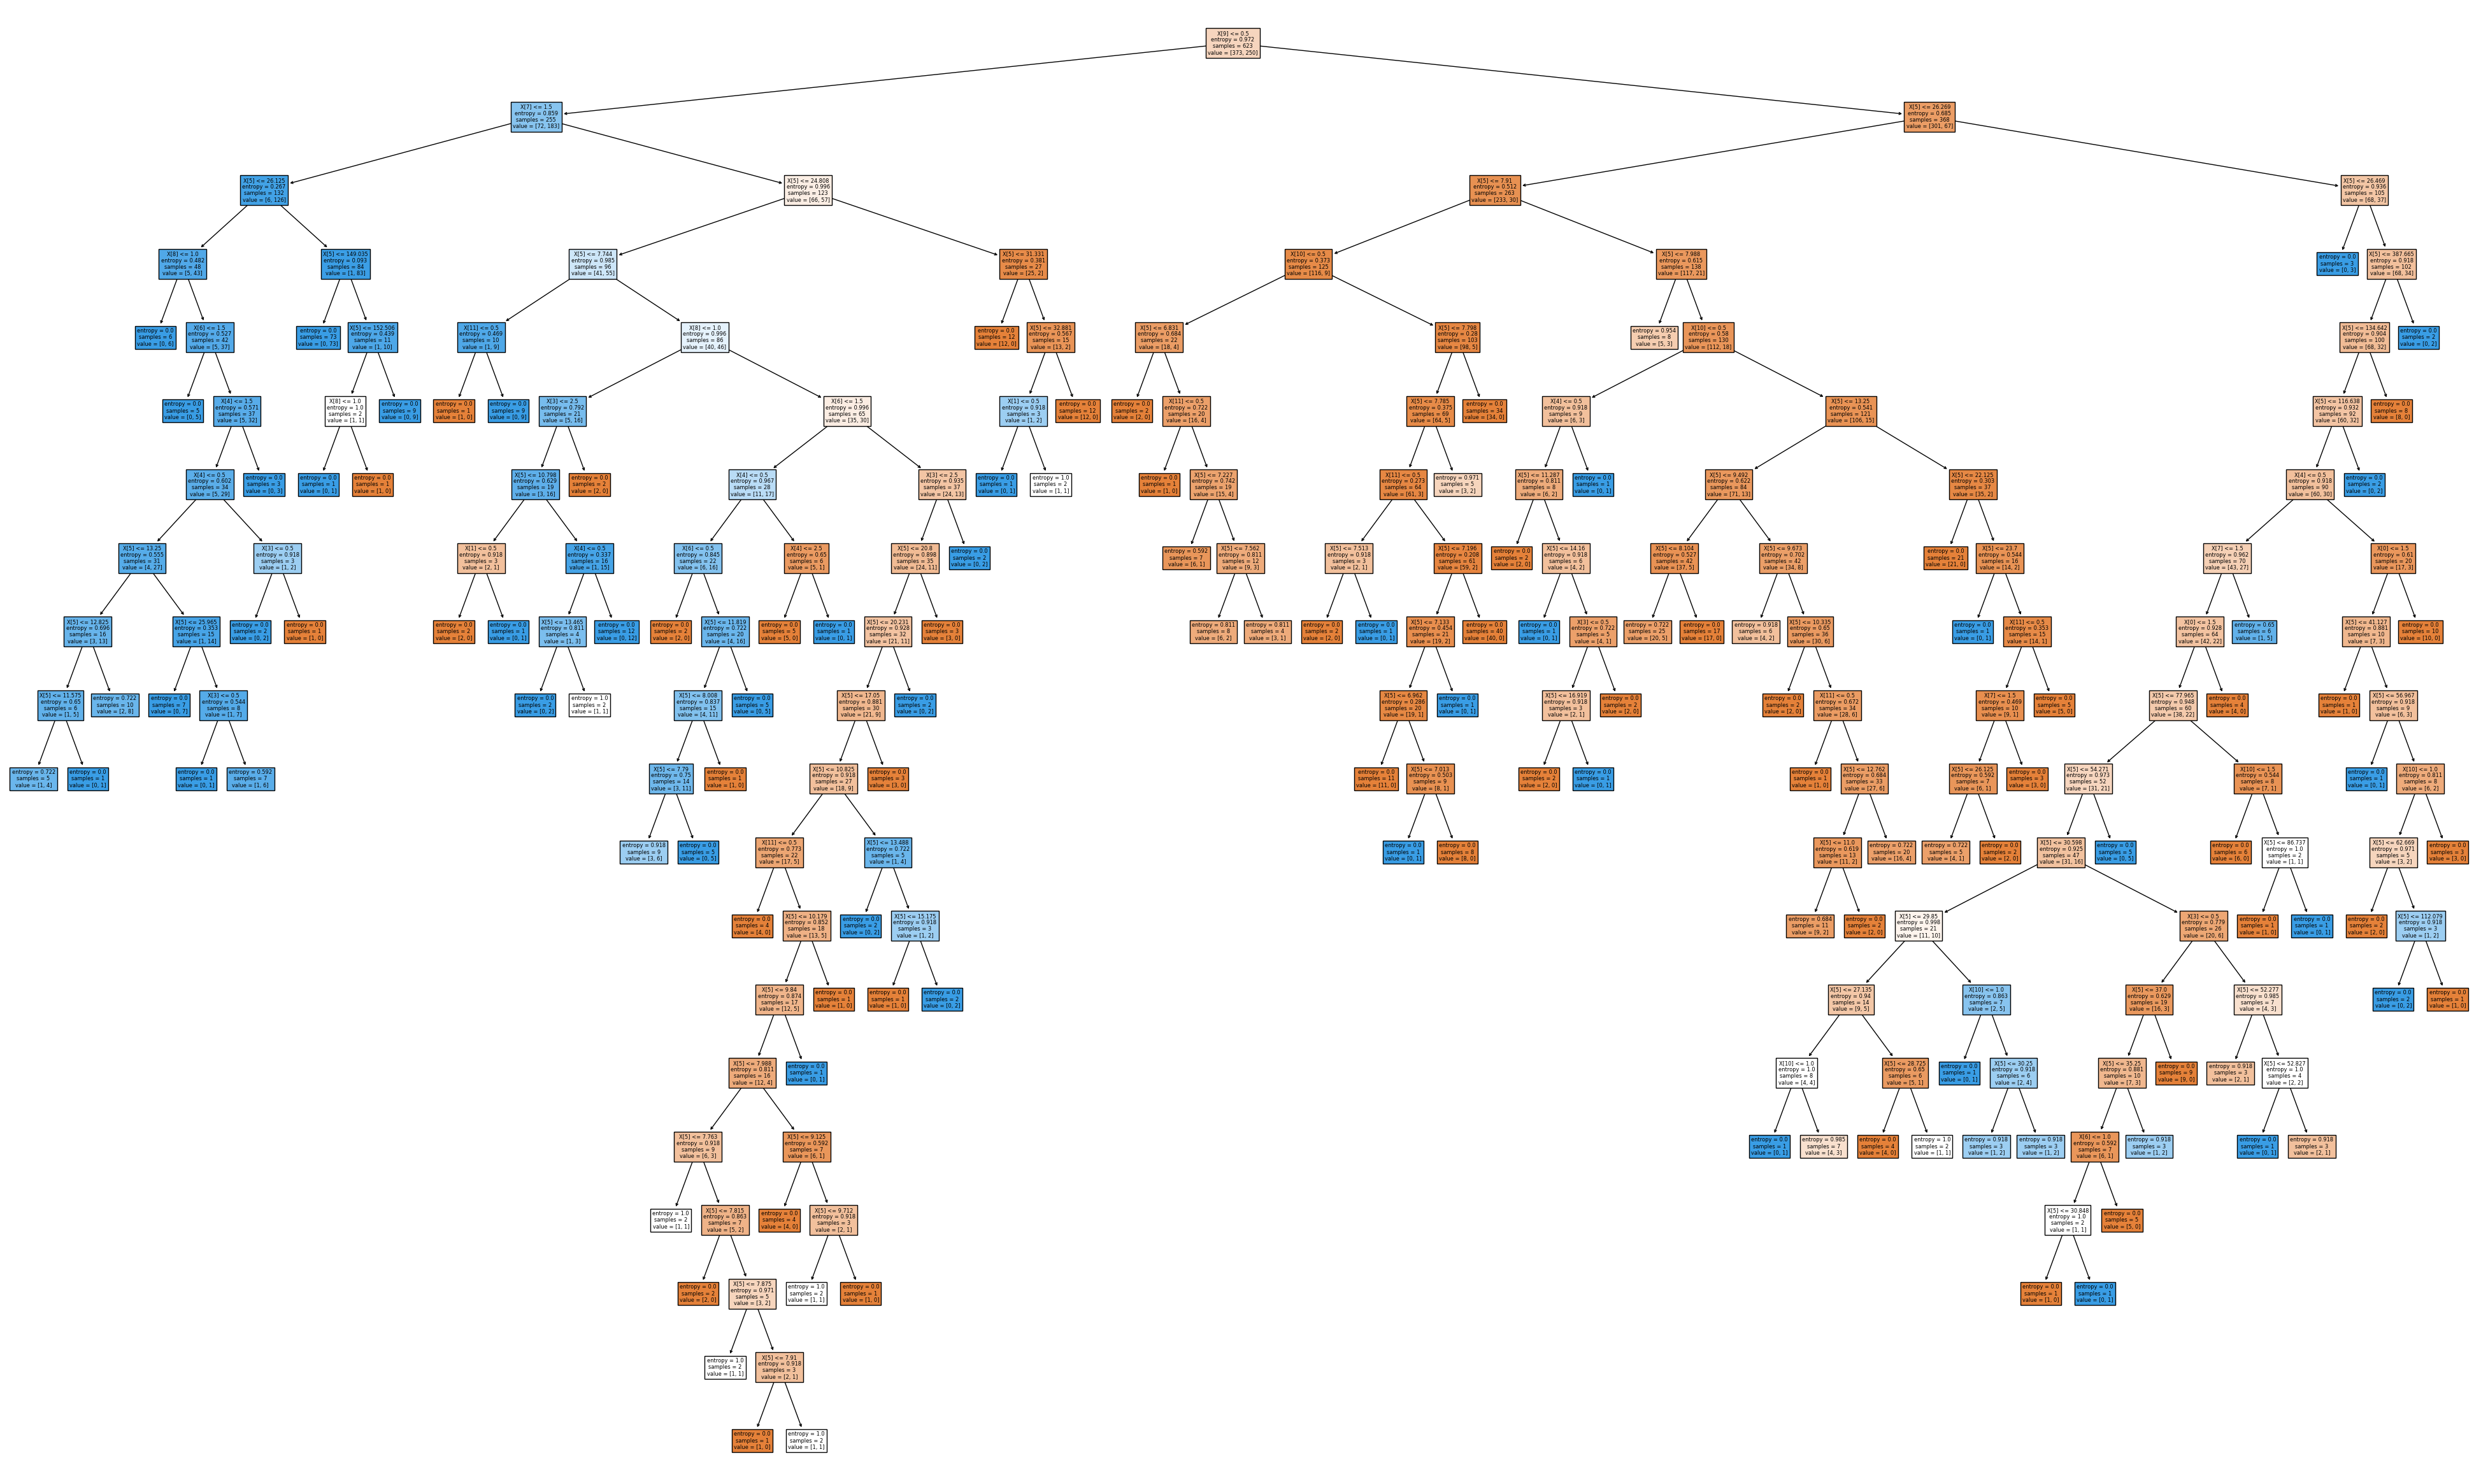

In [54]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(DT,filled=True)
plt.show()